<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Distributions: Part II
              
</p>
</div>

Data Science Cohort Live NYC Nov 2023
<p>Phase 2</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### The normal distribution
- Why do people care so much about this distribution?

Sum of N independent, random variables each following same distribution:

$$ S = X_1 + X_2 + ... + X_N $$

- Each having same mean, variance, etc.
- **S** is a composite variable.

Let each $X_i$ be the result of a Bernoulli trial:

<img src = "Images/simple_bernoulli.png" width = 500>

- $S$ would be how many steps right under $N$ trials.
- What kind of distribution?

Binomial!
3 trials.

In [3]:
from scipy.stats import binom
import matplotlib.pyplot as plt
N = 3
p = 0.5

pmf_binomial = [(x, binom.pmf(x, n = N, p = p)) 
                for x in range(0,10)]

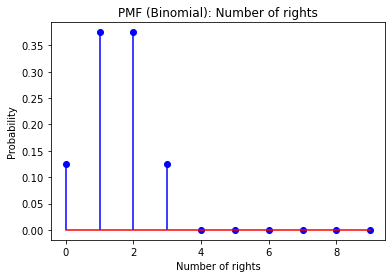

In [4]:
x,y = list(zip(*pmf_binomial))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of rights')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Number of rights')
plt.show()

Plot it for actual distance deviation:

$$ d = n_R - n_L = n_R - (N-n_r)$$

In [5]:
import numpy as np
N = 3
p = 0.5

pmf_deviation = [(x - (N - x), binom.pmf(x, n = N, p = p)) 
                for x in np.arange(-5,5,1)]

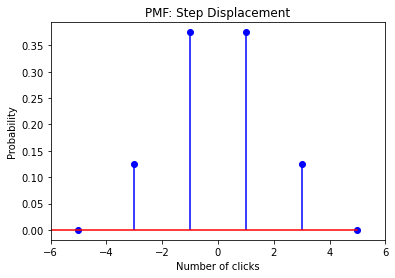

In [6]:
x,y = list(zip(*pmf_deviation))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF: Step Displacement')
plt.xlim(-6,6)
plt.show()

When $N$ gets sufficiently big:

In [7]:
from IPython.display import YouTubeVideo

galton_video = YouTubeVideo('Vo9Esp1yaC8', width = 800, height = 600)

In [8]:
display(galton_video)

- If make slits finer, and $N \rightarrow \infty$ :
- Becomes the continuous normal pdf.

$$ S = X_1 + X_2 + ... + X_N $$ 

follows normal distribution provided that each $X_i$:
- follows a population distribution:
    - Finite variance.
    - Defined mean.



**Most distributions satisfying weak requirements**:

Bernoulli was an underlying distribution that satisfied this.

Sum of random variables drawn from these distribution follows normal distribution as N goes large.

This is underneath why binomial approaches normal as $ N $ gets large:

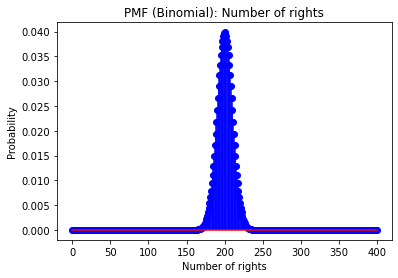

In [63]:
import numpy as np
N = 400
p = 0.5

pmf_largeN = [(x, binom.pmf(x, n = N, p = p)) 
                for x in np.arange(0, N)]

x,y = list(zip(*pmf_largeN))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of rights')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Number of rights')
plt.show()


#### Known as: The central limit theorem

Take N = 200 samples of waiting times of drivers at a toll:

- Follows exponential distribution with average wait time $\tau$
- Has finite variance $\tau^2$.

In [19]:
from scipy.stats import expon

#assume population mean 3 minutes
pop_mean = 3

wait_time_sample = expon.rvs(scale = pop_mean, size = 50)

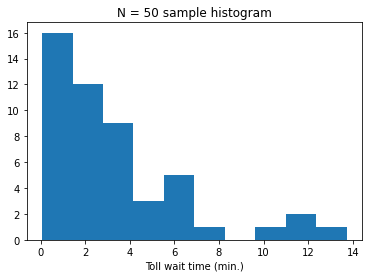

In [21]:
plt.hist(wait_time_sample)
plt.xlabel('Count')
plt.xlabel('Toll wait time (min.)')
plt.title('N = 50 sample histogram')
plt.show()


Obviously, not normal distributed.

- Want statistics/uncertainty of the **sample mean** as we repeat for many trials of samples with N = 50.

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

- Here N = 50
- Apart from factor of (1/N), this is a sum of random variables!

##### Create a list of 10,000 trials of these N = 50 samples from exponential distribution:
- get $N = 50$ sample
- get mean of times in small sample (this is a statistic $\bar{T}$)
- Do this 10,000 times

In [22]:
pop_mean = 3
many_sample_trials = [expon.rvs(loc = pop_mean/2, scale = pop_mean/2, size = 50) for trial in range(10000)]
many_sample_trials[0:2]

[array([2.65406447, 4.48588024, 3.20975972, 1.97080701, 3.40572486,
        3.54812941, 3.26252279, 2.26266962, 2.63051945, 2.25458668,
        2.10541279, 1.62483371, 2.79142216, 2.37767532, 2.09433568,
        1.67761686, 8.68824203, 1.5194634 , 1.86266816, 2.18046134,
        2.37400454, 2.18209207, 1.81670404, 2.0550324 , 4.21597692,
        2.17013678, 2.02026436, 1.75408681, 3.11129773, 6.6796085 ,
        6.90907551, 1.73737335, 2.40524109, 1.6392497 , 3.93343648,
        1.69452971, 1.69128792, 2.1472327 , 1.71442747, 2.45424615,
        2.99092394, 6.57650794, 1.87866634, 2.57873629, 1.74079924,
        4.91429294, 4.08761359, 1.7234978 , 1.64042151, 3.64487423]),
 array([1.56736789, 1.63255653, 5.45297497, 2.24394279, 2.09273238,
        2.19823085, 4.14833624, 2.59147916, 2.75510574, 3.62340609,
        6.44957621, 1.538246  , 3.0423751 , 2.19707189, 4.16125532,
        4.76554163, 2.58957403, 1.85244853, 2.93011625, 1.80636166,
        1.52711961, 2.83514572, 2.14788413, 2.

Return list of 10,000 sample means:

In [23]:
sample_mean_list = [sample.mean() for sample in many_sample_trials]
len(sample_mean_list)
sample_mean_list

[2.861768674851796,
 2.9991700318439256,
 2.991397458347151,
 2.958280783454688,
 3.055733417616711,
 2.9231725915070412,
 2.85936108612339,
 3.0584575629616997,
 3.3284868326958463,
 3.1081803870565103,
 3.0759959957431406,
 2.6011383398920214,
 3.128702063572105,
 2.9526343023384793,
 2.8600940079128736,
 3.170896100508853,
 3.508954654064249,
 3.0368568143842536,
 3.0757129474028684,
 3.1506548892757356,
 2.851244719269326,
 3.037635408731897,
 2.9493597804397584,
 3.015203034472059,
 2.8920075371385634,
 2.6827462211743796,
 2.932302101791253,
 3.2202360192555646,
 2.897930280560941,
 2.989493141580547,
 2.6834023509050433,
 3.087514342348319,
 2.847752170488592,
 3.2240556339937263,
 2.942560400720041,
 3.158417027406626,
 2.8738481254312442,
 2.77335607474581,
 3.1581577748326475,
 2.923910536251394,
 3.049873124057084,
 2.8222483821808857,
 3.092919470872508,
 2.9051497312568415,
 2.9714107066548716,
 3.389411319020774,
 2.6389109890319613,
 2.8186818738431647,
 3.12238048485325

What does the distribution of means look like?

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

Note: mean is sum of random variables drawn from exponential distribution up to a factor

Construct histogram of $\bar{T}$:

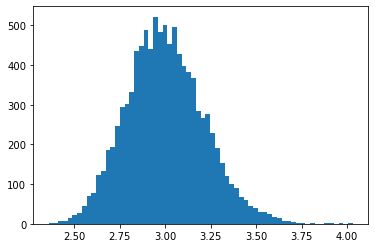

In [24]:
plt.hist(sample_mean_list, bins = "auto")
plt.show()

**The distribution of mean of a sample follow normal distribution**

- Regardless of underlying population distribution.

This is a very large reason why normal distribution is so important!

#### Standard Normal Distribution

- Often useful to rescale normal by mean/std.
- New rescaled normal has mean of 0 and variance of 1.
- Z-distribution.

We simply subtract the mean $\mu$ from each value and then divide by the standard deviation $\sigma$:

$$z = \frac{x - \mu}{\sigma}$$

We call this process **standardization**.

Mathematical form for pdf:
$$ N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

- $\mu$ is mean.
- $\sigma$ is standard deviation.

Scaled transformation:
$$ \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}} $$

<center><img src = "Images/rescale_normal.png" width = 500></center>

#### $z$-Score: why this transformation is useful

A **$z$-score** for a data point $x$ (in a normal distribution) is simply the distance to the mean in units of standard deviations

$$\large z = \frac{x - \mu}{\sigma}$$

Transforming observations on original scale to z-score:
- we can see how unlikely a value is. 
- i.e. how many stds away from center of normal

<center><img src = "Images/rescale_normal.png" width = 500></center>

#### The Empirical Rule

- $68\%$ of the values of a normal distribution: lie within 1 standard deviation ($\sigma$) of the mean.
- $95\%$ within $2\sigma$.
- $99.7\%$ within $3\sigma$.  

#### Using .cdf to get empirical rule:

Instead of looking at empirical rule, get probability given z-score:

I have $X$ distributed normally with mean 5 and standard deviation 2:
- How many standard deviations from center of distribution is $X = 9$?
- What percentage of the values lie within a range $X = 1$ and $X=9$?


In [27]:
# calculate z-score:
z_score = (1 - 5)/2
z_score

-2.0

Now want $$ P(- Z^* <= z <= Z^* ) $$

which will compute empirical rule

Using the cdf:

In [29]:
from scipy.stats import norm
# using cdf: probability in an interval
empirical_rule = norm.cdf(z_score) - norm.cdf(- z_score) 
# with z-score we can use standardized normal form

empirical_rule

0.9980647935735634

I have $X$ distributed normally with mean 5 and standard deviation 2:
- What percentage of the values lie within a range $X = -1.2$ to $11.2$?

In [38]:
# calculate z-scores, use cdf

z_score = (11.2 - 5)/2
norm.cdf(z_score) - norm.cdf(-z_score)

0.9980647935735634

I have $X$ distributed normally with mean 5. Standard deviations take on 1, 3 and 5:
- What percentage of the values lie within a range $X = \pm 11.2$ for each standard deviation?

In [90]:
# calculate list of z-scores, use cdf to calculate list of percentages.
for i in range(1,6,2):
    z_score  = (11.2 - 5)/i
    print('Percentage of values of std deviation '+str(i)+' is')
    # print(f"Percentage of values of std deviation {z_score}") (f string)
    print(norm.cdf(z_score)-norm.cdf(-z_score))

Percentage of values of std deviation 1 is
Percentage of values of std deviation 6.199999999999999
0.9999999994353683
Percentage of values of std deviation 3 is
Percentage of values of std deviation 2.0666666666666664
0.9612344258223628
Percentage of values of std deviation 5 is
Percentage of values of std deviation 1.2399999999999998
0.7850246058508261
